In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\Murali krishna\OneDrive\Documents\diabetes.csv")

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.rename(columns={'Pregnancies': 'preg', 'Glucose': 'glucs','BloodPressure':'bp','SkinThickness':'sknth','Insulin':'inslin','BMI':'bmi','DiabetesPedigreeFunction':'dpf','Age':'age','Outcome':'outcome'}, inplace=True)

In [5]:
df.head(10)

,preg,glucs,bp,sknth,inslin,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
df.dtypes

preg         int64
glucs        int64
bp           int64
sknth        int64
inslin       int64
bmi        float64
dpf        float64
age          int64
outcome      int64
dtype: object

In [7]:
df.isnull().sum()

preg       0
glucs      0
bp         0
sknth      0
inslin     0
bmi        0
dpf        0
age        0
outcome    0
dtype: int64

In [8]:
df['outcome'].value_counts()

0    500
1    268
Name: outcome, dtype: int64

In [9]:
df.describe()

,preg,glucs,bp,sknth,inslin,bmi,dpf,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
x=df.drop(['outcome'],axis=1)
y=df[['outcome']]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [12]:
log=LogisticRegression()

In [13]:
log.fit(x_train,y_train)

LogisticRegression()

In [14]:
log.score(x_train,y_train)

0.7895716945996276

In [15]:
log.score(x_test,y_test)

0.7532467532467533

In [16]:
from sklearn import metrics
predictions=log.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[127,  23],
       [ 34,  47]], dtype=int64)

<AxesSubplot:>

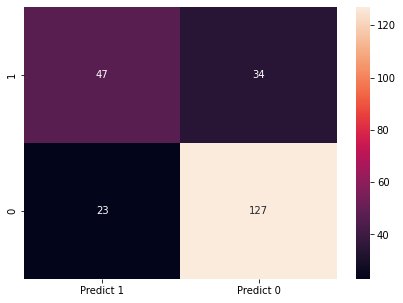

In [17]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')


In [18]:
TP=47
FP=23
TN=127
FN=34
(TP+TN)/(TP+TN+FP+FN)

0.7532467532467533

In [19]:
(FN+FP)/(TP+TN+FP+FN)

0.24675324675324675

In [20]:
0.7532467532467533+0.24675324675324675

1.0

In [21]:
metrics.accuracy_score(y_test,predictions)

0.7532467532467533

In [22]:
metrics.precision_score(y_test, predictions)

0.6714285714285714

In [23]:
metrics.recall_score(y_test, predictions)

0.5802469135802469

In [24]:
log.predict(x_test)[0:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [25]:
log.predict_proba(x_test)[0:10,:]

array([[0.81019251, 0.18980749],
       [0.92679612, 0.07320388],
       [0.24941673, 0.75058327],
       [0.88916466, 0.11083534],
       [0.53153378, 0.46846622],
       [0.2544828 , 0.7455172 ],
       [0.02690057, 0.97309943],
       [0.86376022, 0.13623978],
       [0.09923428, 0.90076572],
       [0.76891064, 0.23108936]])

In [26]:
y_pred_prob=log.predict_proba(x_test)[0:10,:]
y_pred_prob

array([[0.81019251, 0.18980749],
       [0.92679612, 0.07320388],
       [0.24941673, 0.75058327],
       [0.88916466, 0.11083534],
       [0.53153378, 0.46846622],
       [0.2544828 , 0.7455172 ],
       [0.02690057, 0.97309943],
       [0.86376022, 0.13623978],
       [0.09923428, 0.90076572],
       [0.76891064, 0.23108936]])

In [27]:
threshold = 0.3
y_pred = (log.predict_proba(x_test)[:, 1] > threshold).astype('float')
confusion_matrix(y_test, y_pred)

array([[98, 52],
       [17, 64]], dtype=int64)

In [31]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test,y_pred, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_pred)

print(auc_score1)


0.7217283950617284


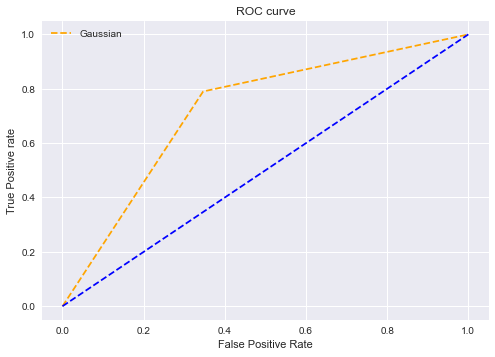

In [32]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Gaussian')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


In [33]:
threshold = 0.8
y_pred = (log.predict_proba(x_test)[:, 1] > threshold).astype('float')
confusion_matrix(y_test, y_pred)

array([[144,   6],
       [ 57,  24]], dtype=int64)

In [34]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test,y_pred, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_pred)

print(auc_score1)


0.6281481481481481


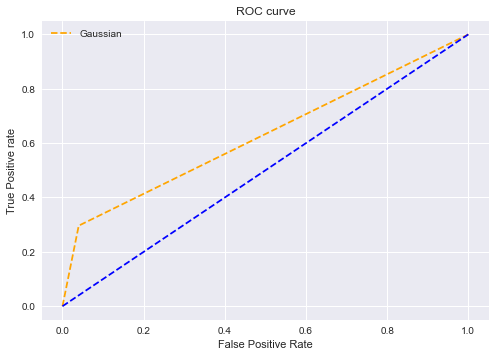

In [35]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Gaussian')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


In [40]:
threshold = 0.6
y_pred = (log.predict_proba(x_test)[:, 1] > threshold).astype('float')
confusion_matrix(y_test, y_pred)

array([[132,  18],
       [ 39,  42]], dtype=int64)

In [54]:
metrics.recall_score(y_test,y_pred)

0.8518518518518519

In [55]:
metrics.precision_score(y_test,y_pred)

0.48936170212765956

In [41]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test,y_pred, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_pred)

print(auc_score1)


0.6992592592592592


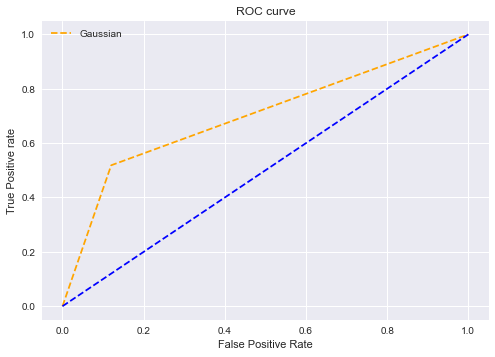

In [42]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Gaussian')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


In [43]:
threshold = 0.5
y_pred = (log.predict_proba(x_test)[:, 1] > threshold).astype('float')
confusion_matrix(y_test, y_pred)

array([[127,  23],
       [ 34,  47]], dtype=int64)

In [44]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test,y_pred, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_pred)

print(auc_score1)


0.7134567901234568


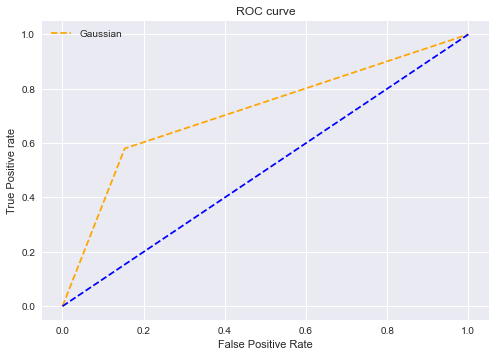

In [45]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Gaussian')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


In [47]:
threshold = 0.4
y_pred = (log.predict_proba(x_test)[:, 1] > threshold).astype('float')
confusion_matrix(y_test, y_pred)

array([[118,  32],
       [ 27,  54]], dtype=int64)

In [48]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test,y_pred, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_pred)

print(auc_score1)


0.7266666666666666


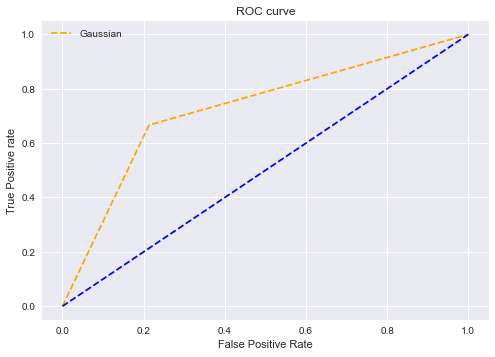

In [49]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Gaussian')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


In [51]:
threshold = 0.2
y_pred = (log.predict_proba(x_test)[:, 1] > threshold).astype('float')
confusion_matrix(y_test, y_pred)

array([[78, 72],
       [12, 69]], dtype=int64)

In [52]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test,y_pred, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_pred)

print(auc_score1)


0.6859259259259259


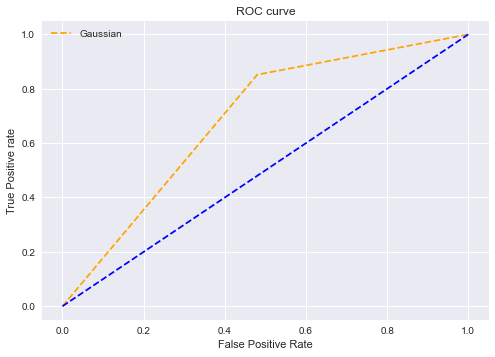

In [53]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Gaussian')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
